In [2]:
from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

from sklearn import svm

trainData = pd.read_csv("train.csv")
testData = pd.read_csv("test.csv")

vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)


In [3]:
X = trainData[['Content']]
Y = trainData[['Label']]

In [4]:
X = vectorizer.fit_transform(trainData['Content'])

In [4]:
Y[0:5]

,Label
0,pos
1,pos
2,pos
3,pos
4,pos


In [5]:
gender = {'pos': 1,'neg': 0}


In [6]:
Y.Label = [gender[item] for item in Y.Label] 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [7]:
Y

,Label
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [8]:
X

<1800x12495 sparse matrix of type '<class 'numpy.float64'>'
	with 508468 stored elements in Compressed Sparse Row format>

In [9]:
Y = Y['Label'].values

In [10]:
from sklearn.neighbors import KNeighborsClassifier
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [11]:
k = 8
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X,Y)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [12]:
test_vectors = vectorizer.transform(testData['Content'])

In [13]:
yhat = neigh.predict(test_vectors)

In [14]:

Ytst = testData[['Label']]


In [15]:
Ytst.Label = [gender[item] for item in Ytst.Label] 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [16]:
Ytst['Label']
yhat

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0], dtype=int64)

In [17]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y, neigh.predict(X)))
print("Test set Accuracy: ", metrics.accuracy_score(Ytst, yhat))

Train set Accuracy:  0.8183333333333334
Test set Accuracy:  0.745


In [18]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X,Y)
    yhat=neigh.predict(test_vectors)
    mean_acc[n-1] = metrics.accuracy_score(Ytst, yhat)

mean_acc

array([0.695, 0.7  , 0.715, 0.725, 0.73 , 0.72 , 0.74 , 0.745, 0.705])

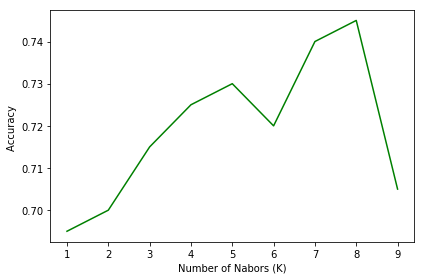

In [19]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [20]:
report = classification_report(Ytst['Label'], yhat, output_dict=True)

In [21]:
print('positive: ', report['1'])
print('negative: ', report['0'])

positive:  {'precision': 0.6880733944954128, 'recall': 0.75, 'f1-score': 0.7177033492822965, 'support': 100}
negative:  {'precision': 0.7252747252747253, 'recall': 0.66, 'f1-score': 0.6910994764397906, 'support': 100}


In [5]:
X

<1800x12495 sparse matrix of type '<class 'numpy.float64'>'
	with 508468 stored elements in Compressed Sparse Row format>